In [1]:
import numpy as np
import networkx as nx

def generate_ppm(q, comm_size, deg_avg, mu):
    n = q*comm_size # total number of nodes
    # Calculate p_out and p_in
    p_out = mu*deg_avg/n
    p_in = (deg_avg - (n - n / q) * p_out) / (n / q - 1)
    #print(f'p_out={p_out}, p_in={p_in}')
    if p_out < 0 or p_out > 1 or p_in < 0 or p_in > 1:
        raise ValueError("Calculated probability is out of the valid range (0, 1).")
    sizes = [n // q] * q  

    # Probability matrix (within and between blocks)
    p_matrix = [[p_in if i == j else p_out for j in range(q)] for i in range(q)]

    # Generate the PPM graph using the SBM generator
    G = nx.stochastic_block_model(sizes, p_matrix, seed=42)
    return G

The average degree of the graph is: 25.08


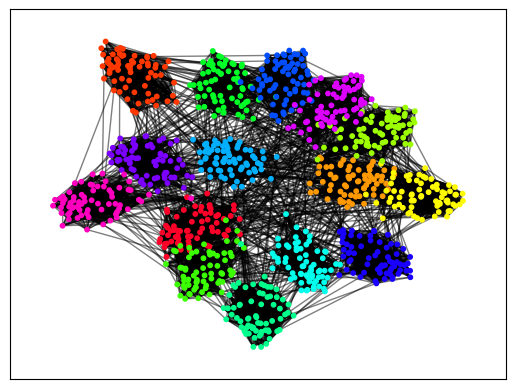

In [2]:
import matplotlib.pyplot as plt

# Parameters for the Planted Partition Model
number_of_comm = 15           # Number of communities
comm_size = 68  # Size of communities
n = number_of_comm*comm_size          # Total number of nodes
deg_avg = 25  # Average degree of the whole network
mu = 0.05  # mixing parameter


G = generate_ppm(number_of_comm, comm_size, deg_avg, mu)


# Calculate the true average degree
avg_degree = sum(dict(G.degree()).values()) / n
print(f"The average degree of the graph is: {avg_degree:.2f}")

intrinsic_membership = list(nx.get_node_attributes(G, 'block').values())

# 对于每个节点，按照其 intrinsic_membership 着色画图
import matplotlib
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                      pos,
                      node_size=10,
                      cmap=matplotlib.colormaps.get_cmap('gist_rainbow'),
                      node_color=intrinsic_membership
                      )
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [3]:
import distanceclosure as dc

edge_distance = {edge: 1 for edge in G.edges()}
# Make sure every edge has an attribute with the distance value
nx.set_edge_attributes(G, name='distance', values=edge_distance)

B = dc.metric_backbone(G, weight='distance')

print(B.number_of_edges(),
G.number_of_edges()
)

12791 12791
